In [43]:
from PIL import Image
import cv2
import scipy.ndimage 
import numpy as np
from matplotlib import pyplot as plt

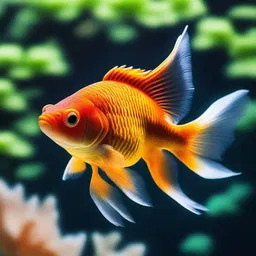

(256, 256, 3)


In [51]:
img = Image.open("../data/original/image1.jpg")
display(img)
img=np.array(img)
print(img.shape)

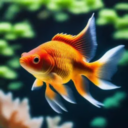

(128, 128, 3)


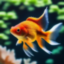

(64, 64, 3)


In [52]:
def downsample(img, kernel_size=(5,5)):
    r = (kernel_size[1] - 1) // 2

    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    R_blurred = scipy.ndimage.gaussian_filter(R, sigma=1, radius=r)
    G_blurred = scipy.ndimage.gaussian_filter(G, sigma=1, radius=r)
    B_blurred = scipy.ndimage.gaussian_filter(B, sigma=1, radius=r)
    blurred_im = np.stack([R_blurred, G_blurred, B_blurred], axis=-1)

    downsampled = blurred_im[::2, ::2, :]
    return downsampled


downsample_img1 = downsample(img)
pil_image1 = Image.fromarray(downsample_img1)
display(pil_image1)
print(downsample_img1.shape)

downsample_img2 = downsample(downsample_img1)
pil_image2 = Image.fromarray(downsample_img2)
display(pil_image2)
print(downsample_img2.shape)

pil_image2.save("../data/downsampled/image1.jpg")

# print(downsample_img.shape)
# plt.imshow(downsample_img.astype(np.uint8))  # Ensure the image is in uint8 format for proper visualization
# plt.axis('off')  # Hide axes for cleaner display
# plt.show()
